In [29]:

import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [30]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [31]:
pima.tail()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1
768,1,93,70,31,0,30.4,0.315,23,0


In [32]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [33]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [34]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [35]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000,random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8082901554404145


c:\Users\sanke\OneDrive\Desktop\DLD\Aniket\python\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


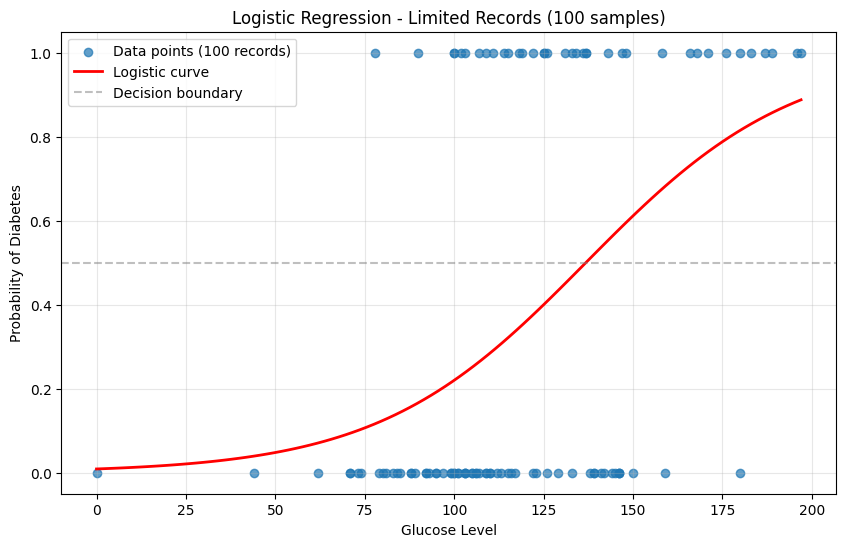

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


pima = pd.read_csv('diabetes.csv')


limited_df = pima.head(100)
X = limited_df[['Glucose']]
y = limited_df['Outcome']

# Train model
model = LogisticRegression().fit(X, y)

# Create smooth curve for decision boundary
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, label='Data points (100 records)')
plt.plot(X_range, y_prob, 'r-', linewidth=2, label='Logistic curve')
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Decision boundary')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression - Limited Records (100 samples)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


from sklearn import metrics
cnf_matrix= metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

Text(0.5, 427.9555555555555, 'Predicted label')

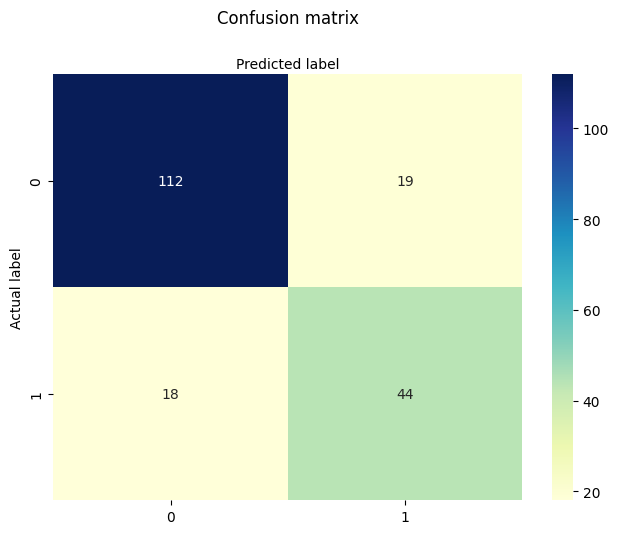

In [37]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [38]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.86      0.85      0.86       131
   with diabetes       0.70      0.71      0.70        62

        accuracy                           0.81       193
       macro avg       0.78      0.78      0.78       193
    weighted avg       0.81      0.81      0.81       193

